In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Timestamp
from datetime import date

today = date.today() # date object
# Format
time_stamp = today.strftime("%m-%d-%Y")

In [3]:
df_tally = pd.read_csv('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/Raw Data/tally.csv', parse_dates=['date'])
df_tally.set_index('date', inplace=True)
df_tally.head()

,total_positive,total_deaths,total_recovered
date,,,
2020-01-31,3,0,1
2020-02-01,3,1,2
2020-03-06,5,1,2
2020-03-07,6,1,2
2020-03-08,10,1,2


In [4]:
ls_positive = np.array(df_tally.total_positive)

new_cases_per_day = np.array([0] + [ls_positive[i] - ls_positive[i-1] for i in range(1, len(ls_positive))])

<IPython.core.display.Javascript object>


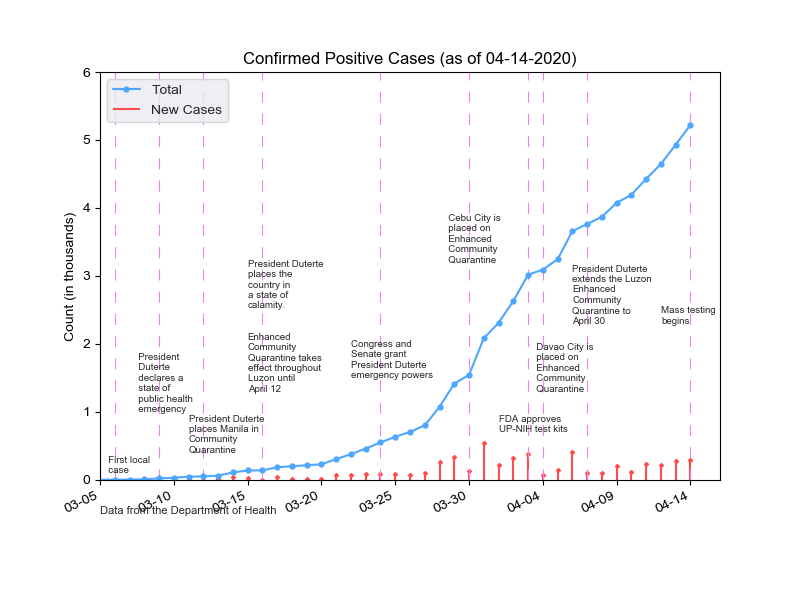

C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-dark')


# Important events
ax.axvline(pd.to_datetime('2020-03-06'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-03-05'), 0.1, '   First local\n   case', fontsize=7)

ax.axvline(pd.to_datetime('2020-03-9'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-03-07'), 1, '   President\n   Duterte\n   declares a\n   state of\n   public health\n   emergency', fontsize=7)

#ax.axvline(pd.to_datetime('2020-03-10'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
#ax.text(pd.to_datetime('2020-03-08'), 1.7, '   Classes in all\n   levels are\n   suspended from\n   March 10-14', fontsize=7)

ax.axvline(pd.to_datetime('2020-03-12'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-03-11'), 0.4, 'President Duterte\nplaces Manila in\nCommunity\nQuarantine', fontsize=7)

ax.axvline(pd.to_datetime('2020-03-16'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-03-15'), 1.3, 'President Duterte\nplaces the\ncountry in\na state of\ncalamity.\n\n\nEnhanced\nCommunity\nQuarantine takes\neffect throughout\nLuzon until\nApril 12', fontsize=7)

#ax.axvline(pd.to_datetime('2020-03-17'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
#ax.text(pd.to_datetime('2020-03-16'), 2.2, '  Airline companies\n  start cancellations\n  of domestic flights', fontsize=7)

ax.axvline(pd.to_datetime('2020-03-24'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-03-22'), 1.5, 'Congress and\nSenate grant\nPresident Duterte\nemergency powers', fontsize=7)

#ax.axvline(pd.to_datetime('2020-03-28'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
#ax.text(pd.to_datetime('2020-03-26'), 2.4, 'Number of\nconfirmed\npositive cases\nsurpass the\n1000-mark', fontsize=7)

ax.axvline(pd.to_datetime('2020-03-30'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-03-28'), 3.2, '   Cebu City is\n   placed on\n   Enhanced\n   Community\n   Quarantine', fontsize=7)

ax.axvline(pd.to_datetime('2020-04-03'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-04-01'), 0.7, 'FDA approves\nUP-NIH test kits', fontsize=7)

ax.axvline(pd.to_datetime('2020-04-04'), lw=.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-04-03'), 1.3, '   Davao City is\n   placed on\n   Enhanced\n   Community\n   Quarantine', fontsize=7)

#ax.axvline(pd.to_datetime('2020-04-06'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
#ax.text(pd.to_datetime('2020-04-05'), 2.3, 'All regions\nhave at\nleast one\nconfirmed\ncase', fontsize=7)

ax.axvline(pd.to_datetime('2020-04-07'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-04-06'), 2.3, 'President Duterte\nextends the Luzon\nEnhanced\nCommunity\nQuarantine to\nApril 30', fontsize=7)

ax.axvline(pd.to_datetime('2020-04-14'), lw=0.8, color='violet', linestyle='--', dashes=(10, 10))
ax.text(pd.to_datetime('2020-04-12'), 2.3, 'Mass testing\nbegins', fontsize=7)



# Plots
df_tally['total_positive'].copy().apply(lambda x: x / 1000).plot(ax=ax, marker='o',
                                            label='Total', lw=1.5, color='#4da6ff', ms=3.5)
ax.vlines(df_tally.index, ymin=0, ymax=new_cases_per_day/1000, lw=1.5, colors='#ff4d4d', label='New Cases') # 
ax.scatter(x=df_tally.index, y=new_cases_per_day/1000, color='#ff4d4d', marker='D', s=4)



plt.xlim(pd.to_datetime('2020-03-05'), pd.to_datetime('2020-04-16'))
plt.ylim(0, 6)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt.title('Confirmed Positive Cases (as of {})'.format(time_stamp))
plt.xlabel(' ')
plt.ylabel('Count (in thousands)')
plt.xticks(rotation=25)


plt.legend(loc=2, frameon=True)

ax.text(pd.to_datetime('2020-03-05'), -0.5, 'Data from the Department of Health', fontsize=8)

plt.savefig('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/images/total_cases', dpi=300, bbox_inches='tight')

# New cases only

<IPython.core.display.Javascript object>


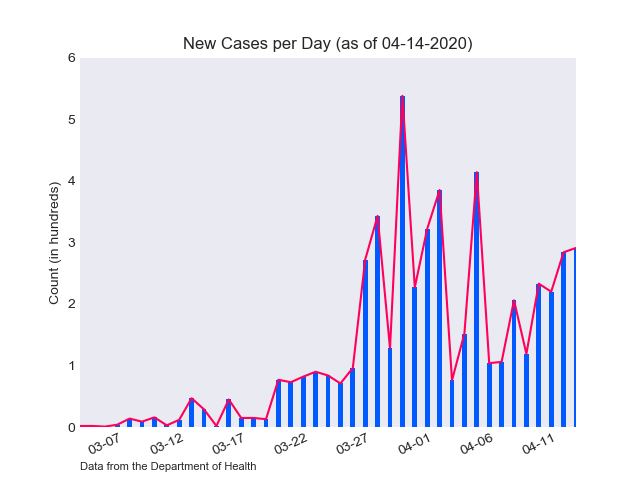

Text(2020-03-05 00:00:00, -0.7, 'Data from the Department of Health')

In [6]:
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-dark')

# Plots
ax.bar(df_tally.index, new_cases_per_day/100, width=0.4, color='#005aff') # 
ax.plot(df_tally.index, new_cases_per_day/100, color="#ff005a")

plt.xlim(pd.to_datetime('2020-03-05'), pd.to_datetime('2020-04-14'))
plt.ylim(0, 6)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt.title('New Cases per Day (as of {})'.format(time_stamp))
plt.xlabel(' ')
plt.ylabel('Count (in hundreds)')
plt.xticks(rotation=25)

ax.text(pd.to_datetime('2020-03-05'), -0.7, 'Data from the Department of Health', fontsize=8)

In [7]:
plt.savefig('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/images/new_cases', dpi=300, bbox_inches='tight')

# Deaths

<IPython.core.display.Javascript object>


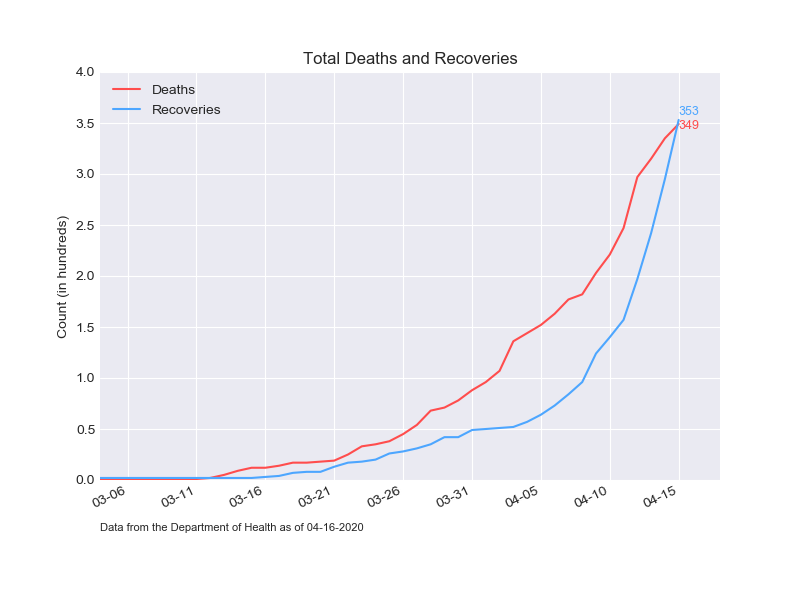

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-dark')

df_tally['total_deaths'].copy().apply(lambda x: x/100).plot(ax=ax, label='Deaths', 
                                                             color='#ff4d4d', lw=1.5)
df_tally['total_recovered'].copy().apply(lambda x: x/100).plot(ax=ax, label='Recoveries', 
                                                             color='#4da6ff', lw=1.5)

# Annotate
## Death
df_tally[df_tally.index == df_tally.index[-1]].total_deaths
ax.text(df_tally.index[-1], df_tally[df_tally.index == df_tally.index[-1]].total_deaths/100 - 0.05, 
        s=df_tally[df_tally.index == df_tally.index[-1]].total_deaths.values[0], fontsize=9, color='#ff4d4d')
## Recovery
df_tally[df_tally.index == df_tally.index[-1]].total_deaths
ax.text(df_tally.index[-1], df_tally[df_tally.index == df_tally.index[-1]].total_recovered/100 + 0.05, 
        s=df_tally[df_tally.index == df_tally.index[-1]].total_recovered.values[0], fontsize=9, color='#4da6ff')

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt.title('Total Deaths and Recoveries'.format(time_stamp))
plt.xlabel(' ')
plt.ylabel('Count (in hundreds)')

plt.xticks(rotation=25)
plt.xlim(pd.to_datetime('2020-03-04'), pd.to_datetime('2020-04-18'))
plt.ylim(0,4)

plt.legend(loc=2)
plt.grid(True)


ax.text(pd.to_datetime('2020-03-04'), -0.5, 'Data from the Department of Health as of {}'.format(time_stamp), fontsize=8)
plt.savefig('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/images/deaths_recoveries', dpi=300, bbox_inches='tight')

# Exponential

<IPython.core.display.Javascript object>


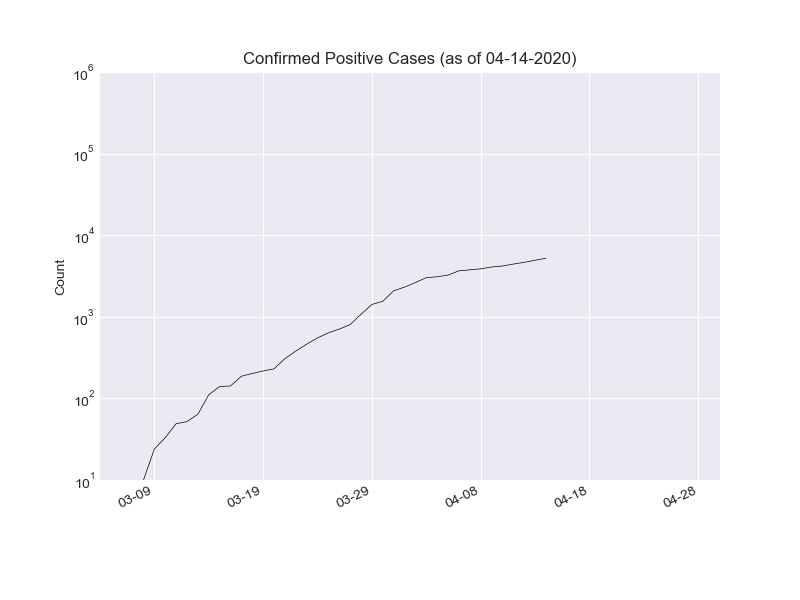

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-dark')

df_tally['total_positive'].plot(ax=ax, label='Cumulative', color='k', lw=0.5)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt.title('Confirmed Positive Cases (as of {})'.format(time_stamp))
plt.xlabel('Date')
plt.ylabel('Count')

plt.xticks(rotation=25)
plt.xlim(pd.to_datetime('2020-03-04'), pd.to_datetime('2020-04-30'))

plt.xlabel(' ')
ax.set_yscale('log')
plt.ylim((10^0, 10**6) )

plt.grid(True)
plt.savefig('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/images/exponential', dpi=300, bbox_inches='tight')